# `UTFVI` TensorFlow Decision Forests

In [1]:
ano = '2000'
md = '6'
folder = 'UHIn - speed + quad + RH + NDVI'
feat = ['windspeed','windquad','RH','NDVI']
t_index = 0

In [2]:
import tensorflow_decision_forests as tf
from tensorflow_decision_forests.tensorflow.core import Task

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, accuracy_score, roc_auc_score, roc_curve

# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

import pandas as pd
from collections import defaultdict

import statsmodels.api as sm
import shap

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import dtreeviz
import numpy as np
import warnings  
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline

random_state = 42 # get reproducible trees

2024-02-14 14:55:17.153493: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-14 14:55:17.223659: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-14 14:55:17.226092: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-14 14:55:18.583606: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import tensorflow_decision_forests as tf
from tensorflow_decision_forests.tensorflow.core import Task

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, accuracy_score, roc_auc_score, roc_curve

# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

import pandas as pd
from collections import defaultdict

import statsmodels.api as sm
import shap

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import dtreeviz
import numpy as np
import warnings  
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline

random_state = 42 # get reproducible trees

## Load Sample Data

In [4]:
# random_state = 1234
# dataset_url = "https://raw.githubusercontent.com/parrt/dtreeviz/master/data/titanic/titanic.csv"
# dataset = pd.read_csv(dataset_url)
# # Fill missing values for Age
# dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# # Encode categorical variables
# dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes

# dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
# dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes

df = pd.read_csv('../era5_modis_daily_estacoes_cuiaba_'+ano+'_01-mensal.csv')
df = df[(df['UHIp']!='nenhum') & (df['UHIp']!='fraco') & (df['UHIp']!='medio')]

In [5]:
df = df[df['UHIp']!='nenhum']

In [6]:
df[df['UHIp']=='extremo']

,index,latitude,longitude,Day,Month,Year,hour,Temp2m,skinTemp,dewPoint,...,HTI,windpower,UHIp,UHIn,UHIp2m,UHIn2m,date,timestamp,local,NDVI
39,2810,-15.632077,-56.056664,18,7,2000,10,15.740991,14.608850,11.124902,...,4.208562,medio,extremo,5.0,forte,3.0,2000-07-18,2000-07-18,COXIPO,0.373431
44,2829,-15.632077,-56.056664,18,7,2000,7,16.577600,15.257959,12.236658,...,9.054637,medio,extremo,5.0,muito_forte,4.0,2000-07-18,2000-07-18,COXIPO,0.373431
45,2830,-15.632077,-56.056664,18,7,2000,8,16.258325,14.941309,11.936639,...,6.628350,medio,extremo,5.0,muito_forte,4.0,2000-07-18,2000-07-18,COXIPO,0.373431
46,2831,-15.632077,-56.056664,18,7,2000,9,16.007715,14.787042,11.572778,...,5.492990,medio,extremo,5.0,forte,3.0,2000-07-18,2000-07-18,COXIPO,0.373431
165,9196,-15.625789,-56.028367,10,5,2000,12,23.746240,26.967493,20.204919,...,165.103126,medio,extremo,5.0,fraco,1.0,2000-05-10,2000-05-10,TIJUCAL,0.288711
425,20282,-15.609619,-56.066097,18,7,2000,10,15.740991,14.608850,11.124902,...,4.208562,medio,extremo,5.0,forte,3.0,2000-07-18,2000-07-18,UFMT,0.338587
430,20301,-15.609619,-56.066097,18,7,2000,7,16.577600,15.257959,12.236658,...,9.054637,medio,extremo,5.0,muito_forte,4.0,2000-07-18,2000-07-18,UFMT,0.338587
431,20302,-15.609619,-56.066097,18,7,2000,8,16.258325,14.941309,11.936639,...,6.628350,medio,extremo,5.0,muito_forte,4.0,2000-07-18,2000-07-18,UFMT,0.338587
432,20303,-15.609619,-56.066097,18,7,2000,9,16.007715,14.787042,11.572778,...,5.492990,medio,extremo,5.0,forte,3.0,2000-07-18,2000-07-18,UFMT,0.338587
559,29018,-15.603331,-56.122241,18,7,2000,10,15.740991,14.608850,11.124902,...,4.208562,medio,extremo,5.0,forte,3.0,2000-07-18,2000-07-18,AECIM,0.289445


In [7]:
# ano = '2020'
mesInicial = 1
mesFinal = 3
# datei = ano+'-'+str(mesInicial)+'-23'
datei = str(int(ano)-1)+'-12'+'-21'
datef = ano+'-'+str(mesFinal)+'-21'
print(datei,datef)

1999-12-21 2000-3-21


In [8]:
df=df.drop_duplicates()

# Convert the date to datetime64
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [9]:
def degToCompass(num):
    val=int((num/22.5)+.5)
    arr=["N","NNE","NE","ENE","L","ESE", "SE", "SSE","S","SSW","SW","WSW","O","WNW","NW","NNW"]
    print(arr[(val % 16)])

In [10]:
df["windspeed"] = df["windspeed"] * 3.6

In [11]:
df['UHIn'].value_counts()

3.0    1822
4.0     194
5.0      39
Name: UHIn, dtype: int64

In [12]:
power = {
     'baixo':0,
     'medio':1, 
     'alto':2,
}

df['windpower'] = df['windpower'].map(power) # re-mapping

In [13]:
def degrees_to_cardinal(d):
    '''
    note: this is highly approximate...
    '''
    dirs = np.array(["N", "NNE", "NE", "ENE", "L", "ESE", "SE", "SSE",
                     "S", "SSW", "SW", "WSW", "O", "WNW", "NW", "NNW"], dtype='U')
    ix = np.round(d / (360. / len(dirs))).astype('i')
    return dirs[ix % 16]

In [14]:
df['winddir_stat_name'] = degrees_to_cardinal(df['winddir']) #o "-1" é para evitar erro de acesso indevido à uma posição inexistente do array
df['winddir_stat'] = degrees_to_cardinal(df['winddir']) #o "-1" é para evitar erro de acesso indevido à uma posição inexistente do array
print(df[['winddir_stat','winddir']])
df["winddir_stat"] = df.winddir_stat.astype("category").cat.codes

     winddir_stat     winddir
0             SSW  201.609773
1             SSW  204.386395
2               S  184.148565
3               S  190.236594
4               N    1.378269
...           ...         ...
2050          NNW  335.832620
2051           NW  324.911049
2052          NNW  342.515673
2053            N    4.926461
2054            N  356.486833

[2055 rows x 2 columns]


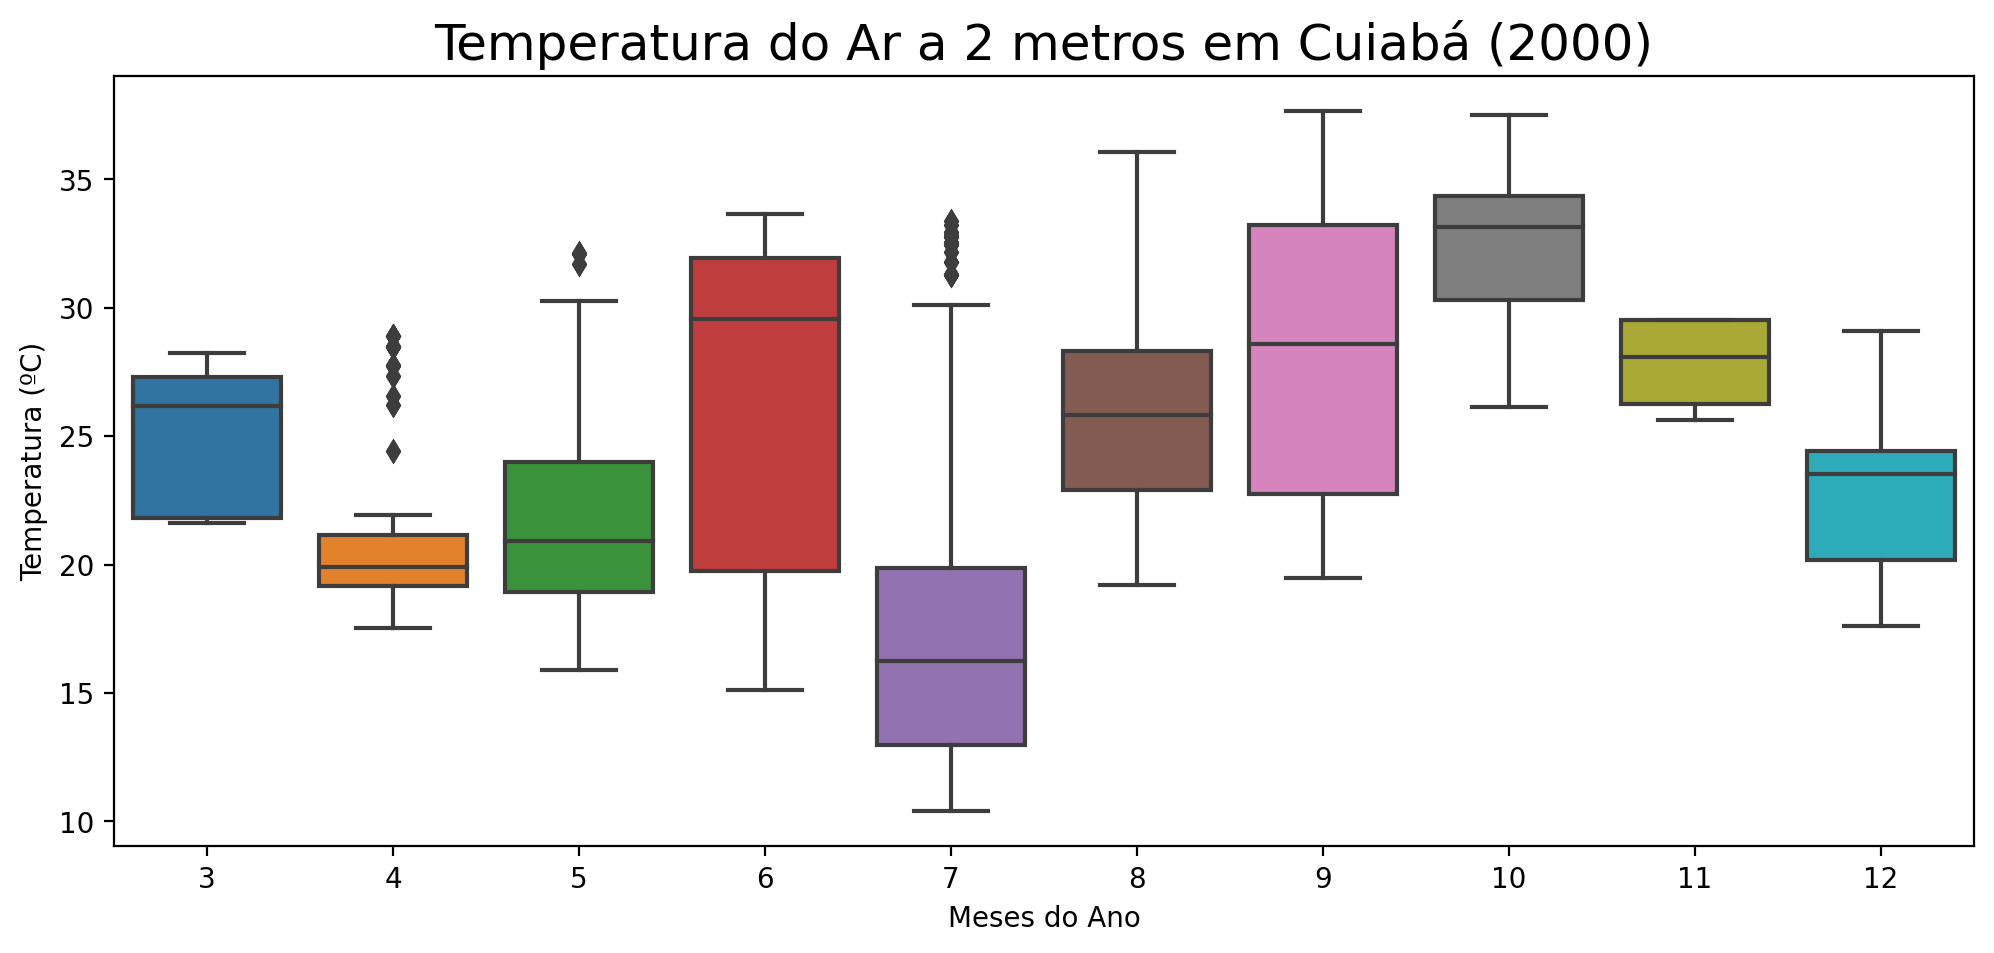

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = df.Month,
                y = df['Temp2m'], 
                ax = ax)
plt.title("Temperatura do Ar a 2 metros em Cuiabá ("+ano+")", loc="center", fontsize=18)
plt.xlabel("Meses do Ano")
plt.ylabel("Temperatura (ºC)")

# ax = sns.stripplot(data = df, x='Precipitação (mm)', y='Temperatura (ºC)', hue="Temperatura (ºC)")  
fig.savefig('cuiaba_boxplot_prec_temp_ar-'+ano+'.png')

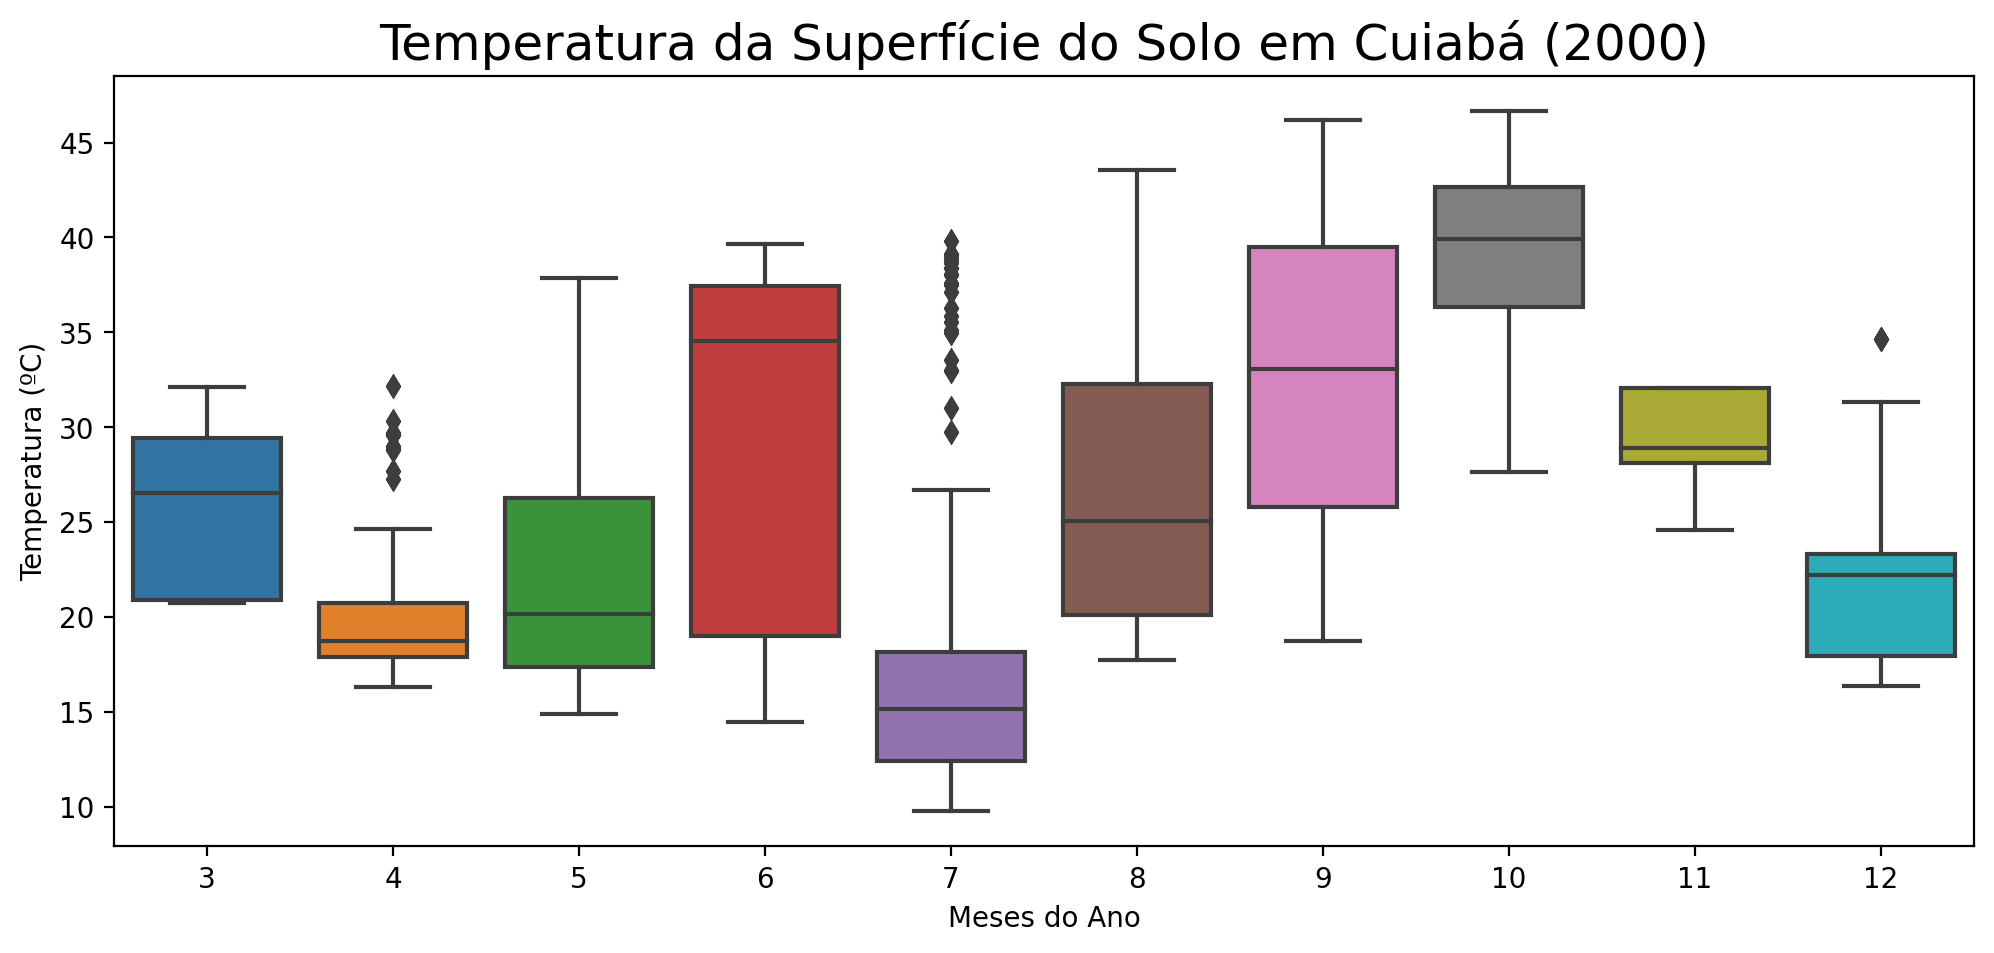

In [16]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = df.Month,
                y = df['skinTemp'], 
                ax = ax)
plt.title("Temperatura da Superfície do Solo em Cuiabá ("+ano+")", loc="center", fontsize=18)
plt.xlabel("Meses do Ano")
plt.ylabel("Temperatura (ºC)")
# ax = sns.stripplot(data = df, x='Precipitação (mm)', y='Temperatura (ºC)', hue="Temperatura (ºC)")  
fig.savefig('cuiaba_boxplot_prec_skintemp-'+ano+'.png')

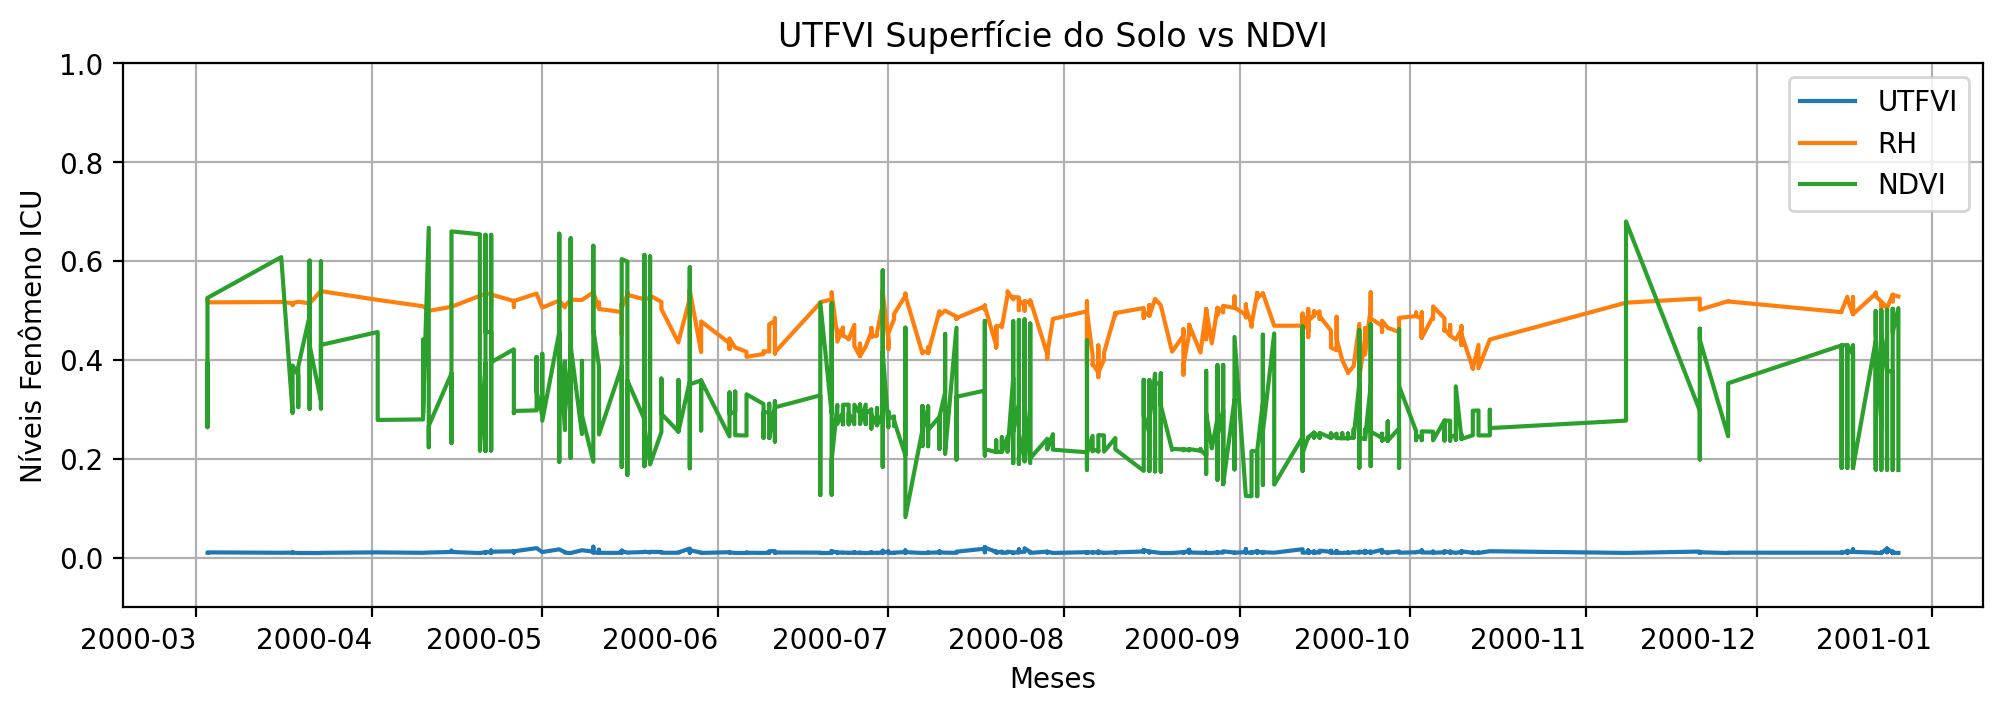

In [17]:
label = 'Meses'
# df.plot(x='date', y=['UTFVI2m','UTFVI'], kind='line', rot=0, grid=True, title='UTFVI do Ar vs UTFVI da Superfície do Solo', xlabel=label,ylabel='Níveis Fenômeno ICU',fontsize=10, figsize=(12,4));
res = df.plot(x='date', y=['UTFVI','RH','NDVI'], kind='line',grid=True, ylim=(-0.1, 1), rot=0, title='UTFVI Superfície do Solo vs NDVI', xlabel=label,ylabel='Níveis Fenômeno ICU',fontsize=10, figsize=(12,4)).get_figure()

# Save figure
res.savefig("RF-IMAGES/classification/extremo/UTFVI/"+folder+"/"+"RF-UTFVI do Solo vs NDVI-"+ano+".png")

In [18]:
del df['date']
del df['longitude']
del df['latitude']
# del df['UHIp']
# del df['skinTemp']
# del df['Temp2m']
# del df['dewPoint']
# del df['total_precipitation']
del df['Day']
del df['Month']
del df['THI']
del df['UHI']
del df['HTI']
del df['Year']
del df['winddir']
del df['winddir_stat']
# del df['RH']
# del df['speed_x']
# del df['speed_y']
# del df['Cidade']
# del df['Região']
# del df['UF']
# del df['total_evaporation']
# del df['windpower']
del df['timestamp']
del df['local']
# del df['UHIp2m']
del df['winddir_stat_name']
del df['skinTemp_mean']
del df['Temp2m_mean']
# del df['surface_pressure']
# del df['UHIn2m']
# del df['UTFVI2m']
del df['hour']

In [19]:
df['windquad'].value_counts()

5.0    825
1.0    386
8.0    356
4.0    181
3.0    108
2.0     83
7.0     80
6.0     36
Name: windquad, dtype: int64

In [20]:
quad = {
    1:'Primeiro',
    2:'Segundo', 
    3:'Terceiro',
    4:'Quarto',
    5:'Quinto',
    6:'Sexto',
    7:'Sétimo',
    8:'Oitavo'
}

df['windquad_cat'] = df['windquad'].map(quad) # re-mapping


In [21]:
# quad = {
#     1:0,
#     2:1, 
#     3:2,
#     4:3,
#     5:4,
#     6:5,
#     7:6,
#     8:7
# }

# df['windquad'] = df['windquad'].map(quad) # re-mapping

In [22]:
utfvi = {
    5:6,
    4:5, 
    3:4,
    2:3,
    1:2,
    0:1,
}

df['UHIn'] = df['UHIn'].map(utfvi) # re-mapping

In [23]:
df['windquad'] = df['windquad'].astype(int)

In [24]:
# df['UHIn2m'] = df['UHIn2m'].astype(int)
df['UHIn'] = df['UHIn'].astype(int)
# df['UHIn'] = df['UHIn'] -1 
df['UHIn'].value_counts()

4    1822
5     194
6      39
Name: UHIn, dtype: int64

In [25]:
# df['UHIt'] = df['UHIn'].apply(lambda x: 1 if x >= 4 else 0)
df['UHIt'] = df['UHIn'].apply(lambda x: 2 if x >= 4 else ( 1 if (x >= 2 and x <= 3) else 0))

In [26]:
df['windquad_cat'].value_counts()

Quinto      825
Primeiro    386
Oitavo      356
Quarto      181
Terceiro    108
Segundo      83
Sétimo       80
Sexto        36
Name: windquad_cat, dtype: int64

In [27]:
df['surface_pressure']

0          99247.55
1          99194.55
2          98543.03
3         100192.17
4          99098.55
           ...     
2050    99041375.00
2051       99014.14
2052    98810836.00
2053       99141.79
2054       99126.25
Name: surface_pressure, Length: 2055, dtype: float64

# Classifiers

To demonstrate classifier decision trees, we trying to model using six features to predict the boolean survived target.

In [28]:
df

,index,Temp2m,skinTemp,dewPoint,total_precipitation,RH,windspeed,total_evaporation,surface_pressure,windquad,UTFVI,UTFVI2m,windpower,UHIp,UHIn,UHIp2m,UHIn2m,NDVI,windquad_cat,UHIt
0,458,20.406335,19.368738,19.408777,0.000000,0.537326,6.248625,-0.000043,99247.55,5,0.012983,0.007189,1,forte,4,medio,2.0,0.461616,Quinto,2
1,479,20.752649,19.689417,19.683069,0.000000,0.536793,6.428343,-0.000043,99194.55,5,0.011372,0.007911,1,forte,4,medio,2.0,0.461616,Quinto,2
2,734,28.909082,29.692499,22.767236,0.000659,0.499757,7.025779,-0.004273,98543.03,5,0.011106,-0.000356,1,forte,4,nenhum,0.0,0.497236,Quinto,2
3,813,10.658563,11.614771,5.106165,0.000090,0.500056,18.847093,-0.000199,100192.17,5,0.010751,-0.000926,2,forte,4,nenhum,0.0,0.380348,Quinto,2
4,1133,28.584863,31.938043,21.664453,0.000933,0.494030,18.742737,-0.000385,99098.55,1,0.010607,-0.000047,2,forte,4,nenhum,0.0,0.352365,Primeiro,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,104507,34.462732,39.604669,13.136255,0.000003,0.401009,8.293895,-0.000885,99041375.00,8,0.010546,0.003390,1,forte,4,fraco,1.0,0.217134,Oitavo,2
2051,104509,33.878748,37.651758,14.598352,0.000003,0.413241,4.624342,-0.000959,99014.14,8,0.010212,0.004581,0,forte,4,fraco,1.0,0.217134,Oitavo,2
2052,104579,34.342401,41.403650,19.521356,0.000199,0.441773,2.069200,-0.001844,98810836.00,8,0.010401,0.002217,0,forte,4,fraco,1.0,0.239179,Oitavo,2
2053,104746,32.259149,37.568201,12.962457,0.000000,0.412361,7.136313,-0.001447,99141.79,1,0.010241,0.004474,1,forte,4,fraco,1.0,0.243214,Primeiro,2


In [29]:
# df[['skinTemp','RH','windspeed','windquad','UHIp','UTFVI','windquad_cat','surface_pressure']].to_csv('../random_forest/era5_'+ano+'.csv')
df[['skinTemp','RH','windspeed','windquad','UHIp','windquad_cat','surface_pressure','NDVI']].to_csv('../random_forest/era5_modis_'+ano+'.csv')

In [30]:
quad = {
    1:0,
    2:1, 
    3:2,
    4:3,
    5:4,
    6:5,
    7:6,
    8:7
}

df['windquad'] = df['windquad'].map(quad) # re-mapping

In [31]:
UTFVI_label = "UHIp"   # Name of the classification target label
classes = list(df[UTFVI_label].unique())
df[UTFVI_label] = df[UTFVI_label].map(classes.index)
print(f"Target '{UTFVI_label}'' classes: {classes}")

Target 'UHIp'' classes: ['forte', 'muito_forte', 'extremo']


In [32]:
df['UHIp'].value_counts()

0    1822
1     194
2      39
Name: UHIp, dtype: int64

In [33]:
df

,index,Temp2m,skinTemp,dewPoint,total_precipitation,RH,windspeed,total_evaporation,surface_pressure,windquad,UTFVI,UTFVI2m,windpower,UHIp,UHIn,UHIp2m,UHIn2m,NDVI,windquad_cat,UHIt
0,458,20.406335,19.368738,19.408777,0.000000,0.537326,6.248625,-0.000043,99247.55,4,0.012983,0.007189,1,0,4,medio,2.0,0.461616,Quinto,2
1,479,20.752649,19.689417,19.683069,0.000000,0.536793,6.428343,-0.000043,99194.55,4,0.011372,0.007911,1,0,4,medio,2.0,0.461616,Quinto,2
2,734,28.909082,29.692499,22.767236,0.000659,0.499757,7.025779,-0.004273,98543.03,4,0.011106,-0.000356,1,0,4,nenhum,0.0,0.497236,Quinto,2
3,813,10.658563,11.614771,5.106165,0.000090,0.500056,18.847093,-0.000199,100192.17,4,0.010751,-0.000926,2,0,4,nenhum,0.0,0.380348,Quinto,2
4,1133,28.584863,31.938043,21.664453,0.000933,0.494030,18.742737,-0.000385,99098.55,0,0.010607,-0.000047,2,0,4,nenhum,0.0,0.352365,Primeiro,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,104507,34.462732,39.604669,13.136255,0.000003,0.401009,8.293895,-0.000885,99041375.00,7,0.010546,0.003390,1,0,4,fraco,1.0,0.217134,Oitavo,2
2051,104509,33.878748,37.651758,14.598352,0.000003,0.413241,4.624342,-0.000959,99014.14,7,0.010212,0.004581,0,0,4,fraco,1.0,0.217134,Oitavo,2
2052,104579,34.342401,41.403650,19.521356,0.000199,0.441773,2.069200,-0.001844,98810836.00,7,0.010401,0.002217,0,0,4,fraco,1.0,0.239179,Oitavo,2
2053,104746,32.259149,37.568201,12.962457,0.000000,0.412361,7.136313,-0.001447,99141.79,0,0.010241,0.004474,1,0,4,fraco,1.0,0.243214,Primeiro,2


In [34]:
X = df[feat]
y = df['UHIp']

In [35]:
features = feat
target = 'UHIp'
# features
dataset_tf = tf.keras.pd_dataframe_to_tf_dataset(df[features + [target]], label=target)
model = tf.keras.RandomForestModel(max_depth=int(md), random_seed = random_state, task=Task.CLASSIFICATION)
model.fit(dataset_tf)

Use /tmp/tmp4nye_tlz as temporary training directory
Reading training dataset...


2024-02-14 14:55:23.450873: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [2055]
	 [[{{node Placeholder/_4}}]]


Training dataset read in 0:00:03.532543. Found 2055 examples.
Training model...
Model trained in 0:00:00.177864
Compiling model...


[INFO 24-02-14 14:55:27.1231 -04 kernel.cc:1242] Loading model from path /tmp/tmp4nye_tlz/model/ with prefix c56141ce7e004b55
[INFO 24-02-14 14:55:27.1452 -04 decision_forest.cc:660] Model loaded with 300 root(s), 10646 node(s), and 4 input feature(s).
[INFO 24-02-14 14:55:27.1452 -04 abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 24-02-14 14:55:27.1452 -04 kernel.cc:1074] Use fast generic engine
2024-02-14 14:55:27.160282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [2055]
	 [[{{node Placeholder/_0}}]]


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


## Initialize dtreeviz model (adaptor)

To adapt dtreeviz to a specific model, use the `model()` function to get an adaptor.  You'll need to provide the model, X/y data, feature names, target name, and target class names:

In [36]:
# model.summary()

In [37]:
# model.make_inspector().variable_importances()

In [38]:
# inspector = model.make_inspector()
# print("Model type:", inspector.model_type())
# print("Number of trees:", inspector.num_trees())
# print("Objective:", inspector.objective())
# print("Input features:", inspector.features())

In [39]:
viz_model = dtreeviz.model(model, tree_index=t_index,
                             X_train=df[features],
                             y_train=df[target],
                             feature_names=features,
                             target_name='Fenômeno ICU',
                             class_names=classes)

We'll use this model to demonstrate dtreeviz functionality in the following sections; the code will look the same for any decision tree library once we have this model adaptor.

## Tree structure visualizations
To show the decision tree structure using the default visualization, call `view()`:

KeyboardInterrupt: 

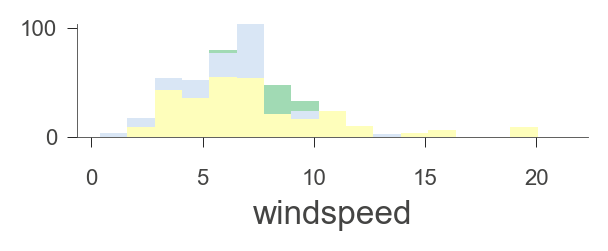

In [40]:
v = viz_model.view(scale=2.1)
v.save("RF-IMAGES/classification/extremo/"+folder+"/"+"RF-UHIn+NDVI x ALL-MD"+md+"-"+ano+".svg")

To change the visualization, you can pass parameters, such as changing the orientation to left-to-right:

In [ ]:
# v = viz_model.view(orientation="LR",scale=2.1)
# v.save("RF-IMAGES/classification/extremo/"+folder+"/"+"RF-UHIn x ALL-LR-MD"+md+"-"+ano+".svg")

To visualize larger trees, you can reduce the amount of detail by turning off the fancy view:

In [ ]:
# viz_model.view(fancy=False)

Another way to reduce the visualization size is to specify the tree depths of interest:

In [ ]:
# v = viz_model.view(depth_range_to_display=(1, 2)) # root is level 0
# v.save("RF-IMAGES/classification/extremo/"+folder+"/"+"RF - UHIn - classification-MD"+md+"-range-"+ano+".svg")

## Prediction path explanations

For interpretation purposes, we often want to understand how a tree behaves for a specific instance. Let's pick a specific instance:

In [ ]:
x = df[features].iloc[np.random.randint(0, len(df)),:].values
x

and then display the path through the tree structure:

In [ ]:
viz_model.view(x=x)
# v.save("RF-IMAGES/classification/extremo/"+folder+"/"+"RF - UHIn - classification-MD"+md+"-predict-"+ano+".svg")

In [ ]:
# v = viz_model.view(x=x, show_just_path=True)
# v.save("RF-IMAGES/classification/extremo/"+folder+"/"+"RF - UHIn - classification-MD"+md+"-path-"+ano+".svg")

You can also get a string representation explaining the comparisons made as an instance is run down the tree:

In [ ]:
print(viz_model.explain_prediction_path(x))

# `Features` Importance

In [ ]:
# # let's create a dictionary of features and their importance values
# feat_dict= {}
# for col, val in sorted(zip(X_train.columns, dt_hp.feature_importances_),key=lambda x:x[1],reverse=True):
#   feat_dict[col]=val

## Leaf info

There are a number of functions to get information about the leaves of the tree.

In [ ]:
# viz_model.leaf_sizes()

In [ ]:
# viz_model.ctree_leaf_distributions()

In [ ]:
viz_model.node_stats(node_id=8).T

In [ ]:
# v = viz_model.ctree_feature_space(features=['windspeed'], show={'splits','legend'}, figsize=(10,5))

In [ ]:
# viz_model.ctree_feature_space(nbins=40, 
#                               gtype='barstacked', 
#                               show={'splits','title'}, 
#                               features=['windspeed','RH'],
#                               figsize=(10,5))

In [ ]:
viz_model.ctree_feature_space(features=['windspeed','NDVI'], show={'splits','legend'}, figsize=(5,5))

In [ ]:
# print(f"Available variable importances:")
# for importance in inspector.variable_importances().keys():
#   print("\t", importance)

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 4))

# # Mean decrease in AUC of the class 1 vs the others.
# variable_importance_metric = "INV_MEAN_MIN_DEPTH"
# variable_importances = inspector.variable_importances()[variable_importance_metric]

# # Extract the feature name and importance values.
# #
# # `variable_importances` is a list of <feature, importance> tuples.
# feature_names = [vi[0].name for vi in variable_importances]
# feature_importances = [vi[1] for vi in variable_importances]
# # The feature are ordered in decreasing importance value.
# feature_ranks = range(len(feature_names))

# bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
# plt.yticks(feature_ranks, feature_names)
# plt.gca().invert_yaxis()

# # TODO: Replace with "plt.bar_label()" when available.
# # Label each bar with values
# for importance, patch in zip(feature_importances, bar.patches):
#   plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

# plt.xlabel(variable_importance_metric)
# plt.title("Mean decrease in AUC of the class 1 vs the others")
# plt.tight_layout()
# plt.show()

In [ ]:
# viz_model.instance_feature_importance(x, figsize=(3.5,2))

# Inspect Individual Trees

In [ ]:
# first_tree = inspector.extract_tree(tree_idx=5)
# print(first_tree.pretty())

In [ ]:
import math
model.compile(metrics=["mse"])
evaluation = model.evaluate(dataset_tf, return_dict=True)

print(evaluation)
print()
print(f"MSE: {evaluation['mse']}")
print(f"RMSE: {math.sqrt(evaluation['mse'])}")

In [ ]:
inspector = model.make_inspector()
print("Model type:", inspector.model_type())
print("Number of trees:", inspector.num_trees())
print("Objective:", inspector.objective())
print("Input features:", inspector.features())

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "INV_MEAN_MIN_DEPTH"
variable_importances = inspector.variable_importances()[variable_importance_metric]
# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))
bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()
# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")
plt.xlabel(variable_importance_metric)## 
plt.title("Features Importance")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify=y)

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rf = RandomForestClassifier(random_state=42, max_depth=int(md))
# fit the model
rf.fit(X_train, y_train)
# Predict the Test set results
y_pred = rf.predict(X_test)
# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
# # Extract single tree
# estimator = rf.estimators_[5]

# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(estimator, out_file='tree.dot', 
#                 feature_names = df[features],
#                 class_names = df[target],
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

In [ ]:
#HABILITAR SOMENTE PARA ENCONTRAR OS MELHORES PARÂMETROS
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)
# print(CV_rfc.cv_results_)
# print(CV_rfc.best_params_)
# print(CV_rfc.best_estimator_)

In [ ]:
rfc1=RandomForestClassifier(random_state=random_state, max_features='sqrt', n_estimators= 500, max_depth=int(md), criterion='gini')
rfc1.fit(X_train, y_train)

pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

In [ ]:
def plot_search_results(grid):
    """
    Params:
    grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_score_time']
    stds_train = results['std_score_time']
    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))
    params=grid.param_grid
    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none',sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())
    plt.legend()
    plt.show()

In [ ]:
# plot_search_results(CV_rfc)

In [ ]:
import seaborn as sns
def plot_cv_results(cv_results, param_x, param_z, metric='rank_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, errorbar=('ci', 99), n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)
rf_RandomGrid.fit(X_train, y_train)

In [ ]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

In [ ]:
rf_RandomGrid.best_params_

In [ ]:
esti = rf_RandomGrid.best_estimator_.n_estimators
mf = rf_RandomGrid.best_estimator_.max_features
md = rf_RandomGrid.best_estimator_.max_depth
crit = rf_RandomGrid.best_estimator_.criterion
esti,mf,md,crit

In [ ]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=esti, max_depth=md, random_state=42, max_features=mf, criterion=crit)
# fit the model to the training set
rfc_100.fit(X_train, y_train)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score
print('Model accuracy score with 500 decision-trees : {0:0.4f}'.format(accuracy_score(y_test, y_pred_100)))

In [ ]:
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: {0:0.4f} ".format(accuracy_score(y_test,pred)))

In [ ]:
# view the feature scores
feature_scores = pd.Series(rfc1.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Pontuação')
plt.ylabel('Variáveis Climáticas')
# Add title to the graph
plt.title("Variáveis importantes")
# Visualize the graph
plt.show()

In [ ]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state = 42)

In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=random_state)
# fit the model to the training set
clf.fit(X_train, y_train)
# Predict on the test set results
y_pred = clf.predict(X_test)
# Check accuracy score
print('Model accuracy score with doors variable removed : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
from sklearn.metrics import classification_report, recall_score
print(classification_report(y_test, y_pred))
# print("Specificity")
# specificity = recall_score(y_test,y_pred, pos_label=0)
# print("Specificity or True Negative Rate: ", specificity)

In [ ]:
from sklearn.ensemble import RandomForestClassifier # from xgboost import XGBClassifier
model = RandomForestClassifier() # XGBClassifier()
model.fit(X, y)
pd.DataFrame({'Variable':X.columns, 'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

In [ ]:
g = sns.pairplot(df[['UHIp','RH','windspeed','windquad','skinTemp','NDVI']], hue='UHIp')
g.fig.suptitle("Scatterplot e Histograma dos pares de variáveis codificado pela Direção do Vento",y=1.05);

In [ ]:
# shap.dependence_plot('RH', shap_values, X_train)

In [ ]:
X = df[feat] #drop(['windquad','windquad_cat','dewPoint','surface_pressure','skinTemp','UTFVI','windpower' ,axis=1)
y = df['UHIp']
X,y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# model = RandomForestClassifier(n_estimators=500, max_depth=int(md), max_features='sqrt', random_state=random_state, criterion='gini')
model = RandomForestClassifier(n_estimators=esti, max_depth=int(md), max_features=mf, random_state=random_state, criterion=crit)
# Fit RandomForestClassifier
rfc = model.fit(X_train, y_train)
# Predict the test set labels
# y_pred = rfc.predict(X_test)
print('o R² do treino é: %.2f'% rfc.score(X_train, y_train))

In [ ]:
#prediction of the training data
ytrain_pred = rfc.predict(X_train)
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_train, ytrain_pred))
print('Mean Squared Error: %.2f'% mean_squared_error(y_train, ytrain_pred))
print('Root Mean Squared Error: %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print('Explained Variance Score: %.2f'% explained_variance_score(y_train, ytrain_pred))

In [ ]:
#Prediction on the testing data
ytest_pred = rfc.predict(X_test)
#the testing coef of determination
print('O R² do Teste é: %.2f'% r2_score(y_test, ytest_pred))
print('O R² do Teste é: %.2f'% rfc.score(X_test, y_test))

In [ ]:
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: %.2f'% mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: %.2f'% np.sqrt(mean_squared_error(y_test, y_pred)))
print('Explained Variance Score: %.2f'% explained_variance_score(y_test, y_pred))

In [ ]:
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, ytest_pred))
print('Mean Squared Error: %.2f'% mean_squared_error(y_test, ytest_pred))
print('Root Mean Squared Error: %.2f'% np.sqrt(mean_squared_error(y_test, ytest_pred)))
print('Explained Variance Score: %.2f'% explained_variance_score(y_test, ytest_pred))

In [ ]:
y_test

In [ ]:
# Plotting the observed and predicted data
import matplotlib.pyplot as plt
# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (40,15)
x_ax = range(len(X_test))
# Plotting
plt.plot(x_ax, y_test, label='Observado', color = 'k', linestyle = '-')
plt.plot(x_ax, ytest_pred, label = 'Previsto', color = 'k', linestyle = '--')
plt.ylabel('Fenômeno ICU', fontsize=15)
plt.xlabel('Testando Dados Amostrais',fontsize=15)
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon =
False,fontsize=15)
# plt.show()
plt.savefig("RF-IMAGES/classification/extremo/"+folder+"/"+"RF-WINDQUAD+NDVIxall-MD"+str(md)+"-"+ano+".png")

In [ ]:
#Plotting the classification errors and residuals
# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (7,4)
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rfc,classes=classes, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix( rfc, 
                     classes=classes, 
                     percent=True
                     #label_encoder={0: 'Forte', 1: 'Muito Forte', 2: 'Extremo'}
)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

In [ ]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(rfc, classes=classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier
visualizer = FeatureImportances(rfc)
visualizer.fit(X_train, y_train)
visualizer.show();

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n', cm)
#####from confusion matrix calculate accuracy
total1=sum(sum(cm))
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

In [ ]:
print(classes)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# X, y = load_spam()
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
# model = LogisticRegression(max_iter=10000)
# model.fit(X_train, y_train)

In [ ]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(rfc, classes = classes) #['Segundo', 'Oitavo', 'Primeiro', 'Sétimo', 'Terceiro', 'Quarto', 'Quinto', 'Sexto'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [ ]:
from sklearn.svm import LinearSVC
from yellowbrick.classifier import ROCAUC
model = LinearSVC()
visualizer = ROCAUC(model)
visualizer.fit(X,y)
visualizer.score(X,y)
visualizer.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Matriz de Confusão - Fenômeno ICU')
print(classification_report(y_test,y_pred))

In [ ]:
# # Organizing feature names and importances in a DataFrame
# features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })
# # Sorting data from highest to lowest
# features_df_sorted = features_df.sort_values(by='importances', ascending=False)
# # Barplot of the result without borders and axis lines
# g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
# sns.despine(bottom = True, left = True)
# g.set_title('Importância das Variáveis Climáticas')
# g.set(xlabel=None)
# g.set(ylabel=None)
# g.set(xticks=[])
# for value in g.containers:
#     g.bar_label(value, padding=2)
# # plt.savefig('importance features '+ano)
# plt.savefig("RF-IMAGES/classification/extremo/"+folder+"/"+"RF-WINDQUADxall-MD"+str(md)+"-"+ano+".png"))
plt.rcParams['figure.figsize'] = (10,7)
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })
# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)
# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
sns.set(font_scale=1.2)
g.set_title('Importância Normalizada das Variáveis Climáticas (ano '+ano+')')
g.set(xlabel='Importância (score)')
g.set(ylabel='Variáveis Independentes')
# g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)
plt.savefig("RF-IMAGES/classification/extremo/"+folder+"/"+"RF-Importance_Features-NDVI-"+ano+".png")

In [ ]:
rfc_ = RandomForestClassifier(n_estimators=500, max_depth=int(md),random_state=random_state,criterion='gini')
rfc_.fit(X_train, y_train)
y_pred = rfc_.predict(X_test)

In [ ]:
regc = rfc_.fit(X_train, y_train)
print('o R² do treino é: %.2f'% regc.score(X_train, y_train))

In [ ]:
regc = rfc_.fit(X_test, y_test)
print('o R² do teste é: %.2f'% regc.score(X_test, y_test))

In [ ]:
cm_ = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_, annot=True, fmt='d').set_title('Matriz de Confusão - Fenômeno ICU para 900 árvores com 8 níveis')
print(classification_report(y_test,y_pred))

In [ ]:
print('Confusion Matrix : \n', cm)
#####from confusion matrix calculate accuracy
total1=sum(sum(cm))
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

In [ ]:
plt.rcParams['figure.figsize'] = (10,7)
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': rfc_.feature_names_in_, 'importances': rfc_.feature_importances_ })
# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)
# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Importância Normalizada das Variáveis Climáticas (ano '+ano+')')
g.set(xlabel='Importância (score)')
g.set(ylabel='Variáveis Independentes')
# g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)
#plt.savefig('importance features '+ano)
plt.savefig("RF-IMAGES/classification/extremo/"+folder+"/"+"importance features-NDVI-"+ano+".png")

In [ ]:
y = df[target]
X = df[feat] #.drop(['UHIn','UTFVI2m','dewPoint','surface_pressure','windquad_cat','skinTemp','UTFVI','windpower'], axis=1)
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500, 
                              max_depth=int(md), 
                              random_state=random_state,
                              max_features='log2',
                              criterion='poisson')
# rfr.fit(X_train, y_train)
# y_pred = rfr.predict(X_test)

In [ ]:
reg = model.fit(X_train, y_train)
print('o R² do treino é: %.2f'% reg.score(X_train, y_train))

In [ ]:
ytrain_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_train, ytrain_pred))
print('Mean Squared Error: %.2f'% mean_squared_error(y_train, ytrain_pred))
print('Root Mean Squared Error: %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print('Explained Variance Score: %.2f'% explained_variance_score(y_train, ytrain_pred))

In [ ]:
#Prediction on the testing data
ytest_pred = reg.predict(X_test)
#the testing coef of determination
print('O R² do Teste é: %.2f'% r2_score(y_test, ytest_pred))
print('O R² do Teste é: %.2f'% reg.score(X_test, y_test))

In [ ]:
# Model Metrics
#MAE
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, ytest_pred))
print('Mean Squared Error: %.2f'% mean_squared_error(y_test, ytest_pred))
print('Root Mean Squared Error: %.2f'% np.sqrt(mean_squared_error(y_test,ytest_pred)))
print('Explained Variance Score: %.2f'% explained_variance_score(y_test,ytest_pred))

In [ ]:
# Plotting the observed and predicted data
import matplotlib.pyplot as plt
# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (40,20)
x_ax = range(len(X_test))
# Plotting
plt.plot(x_ax, y_test, label='Observado', color = 'k', linestyle = '-')
plt.plot(x_ax, ytest_pred, label = 'Previsto', color = 'k', linestyle = '--')
plt.ylabel('Fenômeno ICU',fontsize=18)
plt.xlabel('Testando Dados Amostrais',fontsize=18)
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False,fontsize=18)
plt.show()

In [ ]:
# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (15,8)
#Plotting the prediction errors and residuals
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(reg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [ ]:
# Plotting the residuals
plt.rcParams['figure.figsize'] = (15,8)
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(reg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [ ]:
# the k-fold Cross-Validation (CV)
from sklearn.model_selection import cross_val_score
seed = 42
# training model CV
score_train = cross_val_score(reg, X_train, y_train, scoring ='neg_mean_squared_error', cv = 10)
score_train

In [ ]:
# the absolute mean score
print(np.mean(score_train))
# the absolute mean score
from numpy import absolute
print(absolute(np.mean(score_train)))

In [ ]:
# the testing model CV
score_test = cross_val_score(reg, X_test, y_test, scoring ='neg_mean_squared_error', cv = 10)
score_test
print(absolute(np.mean(score_test)))

In [ ]:
# Random Forest Features Ranking
from sklearn.pipeline import Pipeline
f_list = list(X.columns)
f_importance = pd.Series(reg.feature_importances_, index = f_list).sort_values(ascending = False)
print(f_importance)

In [ ]:
X,y

#### GENERATING TREE DECISION

In [ ]:
# from sklearn import tree
# features = X.columns
# # Obtain just the first tree
# first_tree = reg.estimators_[0]
# plt.figure(figsize=(20,12))
# tree.plot_tree(first_tree,
#                feature_names=features,
#                fontsize=8,
#                filled=True,
#                rounded=True);

### DTREEVIZ - REGRESSOR 

In [ ]:

# viz_model = dtreeviz.model(first_tree, tree_index=t_index, 
#                            X_train=X_train, 
#                            y_train=y_train, 
#                            feature_names=features,
#                            target_name='Fenômeno ICU', 
#                            class_names=classes)
# viz_model.view(scale=1)

In [ ]:
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_train, ytrain_pred))
print('Mean Squared Error: %.2f'% mean_squared_error(y_train, ytrain_pred))
print('Root Mean Squared Error: %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print('Explained Variance Score: %.2f'% explained_variance_score(y_train, ytrain_pred))

In [ ]:
# Model Metrics
#MAE
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, ytest_pred))
print('Mean Squared Error: %.2f'% mean_squared_error(y_test, ytest_pred))
print('Root Mean Squared Error: %.2f'% np.sqrt(mean_squared_error(y_test, ytest_pred)))
print('Explained Variance Score: %.2f'% explained_variance_score(y_test, ytest_pred))

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
print(df[feat+[target]].describe().round(2).T)

In [ ]:
# Data treatment
# ==============================================================================
import scipy.stats as stats
# Visual
# ==============================================================================
import plotly.express as px
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
# Machine Learnig
# ==============================================================================
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Metrics
# ==============================================================================
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Warning Config
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (15,12)
fig = px.histogram(y, x ="UHIp")
fig.show()

In [ ]:
corr = df[feat+[target]].corr()
fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),
    xgap=4, ygap=4,
    zmin=-1, zmax=1, 
    # colorscale='RdYlGn',
    colorbar_thickness=30,
    colorbar_ticklen=3,
)
fig.update_layout(title_text='<b>Matriz da Correlação<b>',
                  title_x=0.5,
                  titlefont={'size': 24},
                  width=700, height=500,
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',
                  paper_bgcolor=None,
)
fig.show()

In [ ]:
Y = df[target]
X = df[feat]
Model = sm.OLS(Y, sm.add_constant(X))
Results = Model.fit()
print(Results.summary())

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")

In [ ]:
model = LinearRegression().fit(X, y)
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

In [ ]:
import statsmodels.api as sm
x, y = np.array(df[feat]), np.array(df[target])
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

In [ ]:
x = df[feat]
y = df[target]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

In [ ]:
X = df[feat+[target]].iloc[:, 1].values.reshape(-1, 1) # values converts it into a numpy array
Y = df[feat+[target]].iloc[:, 2].values.reshape(-1, 1) # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression() # create object for the class
linear_regressor.fit(X, Y) # perform linear regression
Y_pred = linear_regressor.predict(X) # make predictions

In [ ]:
# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
y = df['windquad'].values.reshape(-1, 1)
X = df['UHIp'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

In [ ]:
def calc(slope, intercept, UTFVI):
    return slope*UTFVI+intercept
score = calc(regressor.coef_, regressor.intercept_, .0022)
print(score)

In [ ]:
# Passing 9.5 in double brackets to have a 2 dimensional array
score = regressor.predict([[0.0022]])
print(score)

In [ ]:
y_pred = regressor.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

In [ ]:
print(df[feat + [target]].describe().round(2).T)

In [ ]:
import seaborn as sns # Convention alias for Seaborn
variables = feat
for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y=target, data=df).set(title=f'Regressão de {var} e Fenômeno ICU');

In [ ]:
correlations = df[feat + [target]].corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heat map das Variáveis Microclimáticas (Pearson)');

In [ ]:
y = df[target]
X = df[feat]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

In [ ]:
feature_names = X.columns
model_coefficients = regressor.coef_
coefficients_df = pd.DataFrame(data = model_coefficients, 
                               index = feature_names,
                               columns = ['Coefficient value'])
print(coefficients_df)

In [ ]:
y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

In [ ]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)
print(regressor.score(X_test, y_test))
print(regressor.score(X_train, y_train))

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
md = '5'
tree_classifier = DecisionTreeClassifier(max_depth=int(md), random_state=random_state, max_features='auto', criterion='gini')
tree_classifier.fit(df[features].values, df[target].values)

In [ ]:
viz_model = dtreeviz.model(tree_classifier, 
                           X_train=df[features],
                           y_train=df[target],
                           feature_names=features,
                           target_name='Fenômeno ICU',
                           class_names=classes)
viz_model.view(scale=0.8)

In [ ]:
v.save("RF-IMAGES/classification/extremo/"+folder+"/"+"RF-UHIn-NDVI x ALL-MD"+md+"-DT-"+ano+".svg")

#### DECISION TREE - FEATURES IMPORTANCES

In [ ]:
# Extracting the importances by sklearn 
importances_sk = tree_classifier.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

print(f"Feature importance by sklearn: {feature_importance_sk}")

In [ ]:
feat_importances = pd.DataFrame(tree_classifier.feature_importances_, index=df[features].columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [ ]:
n_features = df[features].shape[1]
plt.barh(range(n_features),tree_classifier.feature_importances_,align='center')
plt.yticks(ticks=np.arange(n_features), labels=df[features].columns)
plt.xlabel('Features Importances')
plt.ylabel('Variáveis micro-climáticas')
         

In [ ]:
feature_scores = pd.Series(tree_classifier.feature_importances_, index=feature_importance_sk).sort_values(ascending=False)

feature_scores, feature_scores.index, df[features]

In [ ]:
plt.rcParams['figure.figsize'] = (10,7)
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': feature_scores.index, 'importances': tree_classifier.feature_importances_ })
# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)
# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Importância Normalizada das Variáveis Climáticas (ano '+ano+')')
g.set(xlabel='Importância (score)')
g.set(ylabel='Variáveis Independentes')
# g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)
#plt.savefig('Importance Features - DecisionTree_'+ano)
plt.savefig("RF-IMAGES/classification/extremo/"+folder+"/"+"Importance Features - DecisionTree-NDVI-"+ano+".png")

In [ ]:
# # Creating a seaborn bar plot

# f, ax = plt.subplots(figsize=(30, 24))
# ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df[features])
# ax.set_title("Visualize feature scores of the features")
# ax.set_yticklabels(feature_scores.index)
# ax.set_xlabel("Feature importance score")
# ax.set_ylabel("Features")
# plt.show()

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),
('pca', pca),
('dec_tree', dec_tree)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components,
dec_tree__criterion=criterion,
dec_tree__max_depth=max_depth)

In [ ]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_features': ['sqrt', 'log2'],
'ccp_alpha': [0.1, .01, .001],
'max_depth' : [5, 6, 7, 8, 9],
'criterion' :['gini', 'entropy']
}
tree_clas = DecisionTreeClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)
final_model = grid_search.best_estimator_
final_model

In [ ]:
#Training the model
tree_clas = DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='entropy',
max_depth=9, max_features='sqrt', max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0,
random_state=42, splitter='best')
tree_clas.fit(X_train, y_train)
y_predict = tree_clas.predict(X_test)
y_predict

In [ ]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

In [ ]:
import xgboost
import shap

model = xgboost.XGBClassifier(n_estimators=20)
model.fit(X, y)

In [ ]:
# equilibrated case
background = X.sample(1000) #X is equilibrated# background used in explainer defines base value
explainer = shap.TreeExplainer(model,background,model_output="raw" )
shap_values = explainer.shap_values(X)# background used in the plot, the points that are visible on the plot
shap.summary_plot(shap_values,background, feature_names=background.columns)

In [ ]:
shap.summary_plot(shap_values[2], X)
shap.summary_plot(shap_values[1], X)
shap.summary_plot(shap_values[0], X)

In [ ]:
# shap.dependence_plot(“alcohol”, shap_values, X_train)
# shap.dependence_plot("RH", shap_values[0], X)

In [ ]:
shap.dependence_plot('windspeed', shap_values[0], X, interaction_index="RH")

In [ ]:
shap.initjs()

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[0], X)

In [ ]:
columIndex= 2
shap.force_plot(explainer.expected_value[1], shap_values[1][columIndex,:], X.iloc[columIndex,:], link="logit")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape)

In [ ]:
clf = RandomForestClassifier(n_estimators=500, max_depth=8)
clf.fit(X_train, y_train)

In [ ]:
explainer = shap.TreeExplainer(clf)
shap_values = np.array(explainer.shap_values(X_train))
print(shap_values.shape)

In [ ]:
shap_values_ = shap_values.transpose((1,0,2))

np.allclose(
    clf.predict_proba(X_train),
    shap_values_.sum(2) + explainer.expected_value
)

In [ ]:
shap.summary_plot(shap_values[0],X_train)

In [ ]:
rf = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=42, max_features='sqrt', class_weight='balanced')
rf.fit(X_train, y_train)

# Make predictions for the test set
y_pred_test = rf.predict(X_test)

# Print accuracy for the training and test sets
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

In [ ]:
recall_score(y_test, y_pred_test, average=None)[0]

In [ ]:
precision_score(y_test, y_pred_test, average=None)[0]

In [ ]:
from quantile_forest import RandomForestQuantileRegressor
from sklearn.model_selection import train_test_split

qrf = RandomForestQuantileRegressor(random_state=0)
qrf.fit(X_train, y_train)

# Get the training indices for tree=0, leaf=18683.
y_train_leaves = np.asarray(qrf.forest_.y_train_leaves)
train_indices = y_train_leaves[0, 2, :] - 1
train_indices = train_indices[train_indices >= 0]

# Get the training response values for the training indices
print(np.array(qrf.forest_.y_train)[train_indices])


In [ ]:
y_train_leaves.shape

In [ ]:
# n_trees, n_nodes, _ = y_train_leaves.shape
# for tree_i in range(n_trees):
#     for node_j in range(n_nodes):
#         train_indices_ij = y_train_leaves[tree_i, node_j] - 1
#         train_indices_ij = train_indices_ij[train_indices_ij >= 0]
#         print(np.array(qrf.forest_.y_train)[train_indices_ij])

In [ ]:

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs


In [ ]:
def fitting(X, y, criterion, splitter, mdepth, clweight, minleaf):

    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model = tree.DecisionTreeClassifier(criterion=criterion, 
                                        splitter=splitter, 
                                        max_depth=mdepth,
                                        class_weight=clweight,
                                        min_samples_leaf=minleaf, 
                                        random_state=42, 
                                  )
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Tree summary and model evaluation metrics
    print('*************** Tree Summary ***************')
    print('Classes: ', clf.classes_)
    print('Tree Depth: ', clf.tree_.max_depth)
    print('No. of leaves: ', clf.tree_.n_leaves)
    print('No. of features: ', clf.n_features_in_)
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    # Use graphviz to plot the tree
    dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns, 
                                class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],
                                filled=True, 
                                rounded=True, 
                                #rotate=True,
                               ) 
    graph = graphviz.Source(dot_data)
    
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, graph

In [ ]:
# Fit the model and display results
X_train, X_test, y_train, y_test, clf, graph = fitting(X, y, 'entropy', 'best', 
                                                       mdepth=8, 
                                                       clweight=None,
                                                       minleaf=1000)

# Plot the tree graph
graph

# Save tree graph to a PDF
#graph.render('Decision_Tree_all_vars_gini')

In [ ]:
# Fit the model and display results
X_train, X_test, y_train, y_test, clf, graph = fitting(X, y, 'entropy', 'best', 
                                                       mdepth=8, 
                                                       clweight=None, 
                                                       minleaf=1000)

# Plot the tree graph
graph

In [ ]:
# !pip install pycaret

In [ ]:
# from pycaret.classification import *
# s = setup(data = df[feat], target = df['UHIp'], session_id=123)

In [ ]:
# best_model = compare_models()

In [ ]:
# dt = create_model('rf')

In [ ]:
# print(dt)

In [ ]:
df[target]

In [ ]:
df2 = df[['windspeed', 'windquad', 'RH','UHIp','NDVI']]
df2

In [ ]:
# Distribution of all parameters wrt price.
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*4))
numerical_feats = df2.dtypes[df2.dtypes != "object"].index
li_num_feats = list(numerical_feats)
li_not_plot = ['id']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(x = df[['windspeed', 'windquad', 'RH','UHIp','NDVI']][li_plot_num_feats[i]], y= df['NDVI'], ax = axs[r][c])
            stp = stats.pearsonr(df2[li_plot_num_feats[i]], df2['NDVI'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
sns.set(color_codes=True)
plt.show()   

In [ ]:
# Features having coorelation to price
sns.set(color_codes=True)
df2.corrwith(df2.UHIp).plot.bar( figsize = (12, 5), title = "Correlação em função do UTFVI", fontsize = 15, rot = 0, grid = True);

In [ ]:
df2[li_plot_num_feats[2]]

In [ ]:
df2

In [ ]:
import folium
import warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap

folds  = 5

sns.set(color_codes=True)

warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import r2_score
# from ml_metrics import rmse
from scipy import stats
from sklearn.model_selection import GridSearchCV
score_calc = 'neg_mean_squared_error'

In [ ]:
house_price_data = pd.read_csv("../kc_house_data.csv")
house_price_data = house_price_data.drop(["date","id"], axis = 1)

In [ ]:
house_price_data

In [ ]:
# # Distribution of all parameters wrt price.
# nr_rows = 3
# nr_cols = 6

# fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*4))

# numerical_feats = house_price_data.dtypes[df2.dtypes != "object"].index

# li_num_feats = list(numerical_feats)
# li_not_plot = ['id']
# li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]

# for r in range(0,nr_rows):
#     for c in range(0,nr_cols):  
#         i = r*nr_cols+c
#         if i < len(li_plot_num_feats):
#             sns.regplot(x= house_price_data[li_plot_num_feats[i]], y=house_price_data['price'],ax = axs[r][c])
#             stp = stats.pearsonr(house_price_data[li_plot_num_feats[i]], house_price_data['price'])
#             str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
#             axs[r][c].set_title(str_title,fontsize=11)
            
# plt.tight_layout()    
# sns.set(color_codes=True)
# plt.show()   
# Distribution of all parameters wrt price.
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*4))

numerical_feats = df2.dtypes[df2.dtypes != "object"].index

li_num_feats = list(numerical_feats)
li_not_plot = ['id']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(x= df2[li_plot_num_feats[i]], y=df2['NDVI'],ax = axs[r][c])
            stp = stats.pearsonr(df2[li_plot_num_feats[i]], df2['NDVI'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
sns.set(color_codes=True)
plt.show()   

In [ ]:
# # # Features having coorelation to price
# sns.set(color_codes=True)
# house_price_data.corrwith(house_price_data.price).plot.bar( figsize = (12, 5), title = "Correlation with respect to Prices", fontsize = 15, rot = 90, grid = True);
# Features having coorelation to price
sns.set(color_codes=True)
df2.corrwith(df2.NDVI).plot.bar( figsize = (12, 5), title = "Correlação com NDVI", fontsize = 15, rot = 90, grid = True);


In [ ]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.factorplots import interaction_plot

In [ ]:
results = smf.ols('skinTemp ~ RH + windspeed + windquad + NDVI', data=df).fit()
table = sm.stats.anova_lm(results, typ=1)
table

In [ ]:
print(results.summary())

In [ ]:
df.dtypes

In [ ]:
# two variables of interest
sample_df = df[['Temp2m', 'RH','windspeed','windquad','NDVI']]
groups = sample_df.groupby('windquad').count().reset_index()

In [ ]:
# Create ANOVA backbone table
data = [['Entre grupos', '', '', '', '', '', ''], ['Dentro dos Grupos', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Fonte da Variação', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Fonte da Variação', inplace = True)

# calculate SSTR and update anova table
x_bar = df['Temp2m'].mean()
SSTR = sample_df.groupby('windquad').count() * (sample_df.groupby('windquad').mean() - x_bar)**2
anova_table['SS']['Entre grupos'] = SSTR['Temp2m'].sum()

# calculate SSE and update anova table
SSE = (sample_df.groupby('windquad').count() - 1) * sample_df.groupby('windquad').std()**2
anova_table['SS']['Dentro dos Grupos'] = SSE['Temp2m'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Temp2m'].sum() + SSE['Temp2m'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Entre grupos'] = sample_df['windquad'].nunique() - 1
anova_table['df']['Dentro dos Grupos'] = sample_df.shape[0] - sample_df['windquad'].nunique()
anova_table['df']['Total'] = sample_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Entre grupos'] / anova_table['MS']['Dentro dos Grupos']
anova_table['F']['Entre grupos'] = F

# p-value
anova_table['P-value']['Entre grupos'] = 1 - stats.f.cdf(F, anova_table['df']['Entre grupos'], anova_table['df']['Dentro dos Grupos'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Entre grupos'] = stats.f.ppf(1-alpha, anova_table['df']['Entre grupos'], anova_table['df']['Dentro dos Grupos'])

# Final ANOVA Table
anova_table

## Verificação de suposição de homogeneidade de variância

In [ ]:
# calcular a proporção do maior para o menor desvio padrão da amostra
ratio = sample_df.groupby('windquad').std().max() / sample_df.groupby('windquad').std().min()
ratio

In [ ]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_majors = sample_df['windquad'].unique()
for major in unique_majors:
    stats.probplot(sample_df[sample_df['windquad'] == major]['Temp2m'], dist="norm", plot=plt)
    plt.title("Probabilidade- Temperatura do ar (2m) e Direção do Vento (quadrante) " +  major.astype(str))
    plt.show()

# Testando hipóteses

## De acordo com o processo de cinco etapas de teste de hipóteses:
## H₀: μ₁= μ₂ = μ₃ =… = μ₆
## H₁: Nem todas as médias das temperaturas são iguais
## α = 0,05
## De acordo com as estatísticas do teste F:

In [ ]:
# The p-value approach
print("Abordagem 1: A abordagem do valor p para testes de hipóteses na regra de decisão")
conclusion = "Falha ao rejeitar a hipótese nula."
if anova_table['P-value']['Entre grupos'] <= alpha:
    conclusion = "Hipótese nula foi rejeitada."
print("F-score é:", anova_table['F']['Entre grupos'], " e p value é:", anova_table['P-value']['Entre grupos'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Abordagem 2: A abordagem do valor crítico para testes de hipóteses na regra de decisão")
conclusion = "Falha ao rejeitar a hipótese nula."
if anova_table['F']['Entre grupos'] > anova_table['F crit']['Entre grupos']:
    conclusion = "Hipótese nula foi rejeitada."
print("F-score é:", anova_table['F']['Entre grupos'], " e valor crítico é:", anova_table['F crit']['Entre grupos'])
print(conclusion)

In [ ]:
dataframe = df

print(dataframe.shape)

print(dataframe.head(n=5))

print(dataframe.columns)

print(dataframe.info())


In [ ]:
# del df['windpower']
# del df['UHIn']
# del df['UHIp2m']
# del df['UHIn2m']
# del df['windquad_cat']
# del df['UHIt']

In [ ]:
subset=dataframe.iloc[:,1:]

subset.shape


In [ ]:
print(subset.info())

In [ ]:
print(subset.isnull().sum())

In [ ]:
print(subset.dropna(inplace=True))

print(subset.shape)

print(subset.columns)

In [ ]:
labels=pd.Categorical(subset['UHIp'])
labels

In [ ]:
subset.head()

In [ ]:
subset['UHIp'].value_counts()

In [ ]:
subset['UHIp'].value_counts().plot.bar()

In [ ]:
subset.iloc[:,0:].describe().transpose()

In [ ]:
subset.corr()

In [ ]:
sns.heatmap(subset.corr(),cmap='coolwarm')

In [ ]:
X = subset[feat]
y = subset['UHIp']

In [ ]:
X

In [ ]:
y

In [ ]:
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

In [ ]:
classes

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

#Random Forest Classifier
#because we are dealing with multiclass data and so, the one versus rest strategy is used.
#learn to predict each class against the other.

RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_norm,y_train)
y_pred =RF.predict(X_test_norm)
pred_prob = RF.predict_proba(X_test_norm)


In [ ]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))


In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()
